Mounting the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Mounted at /content/drive
/content/drive


Installing 'statsmodels' library to perform Time-Series methods

In [2]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg           #Time-series method 1
from statsmodels.tsa.arima.model import ARIMA          #Time-series method 2
from math import sqrt
from sklearn.metrics import mean_squared_error

Reading the training and test set

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/training.csv', encoding='latin1')
test_data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/testing.csv', encoding='latin1')

#Converting the year column to datetime format
data.year = pd.to_datetime(data.year, format='%Y')
test_data.year = pd.to_datetime(test_data.year, format='%Y')

In [5]:
#Extracting the datetime and output column from the training dataset 

X = data[["year", "Next_Year_Crime_Rate"]]
X['year'] = pd.to_datetime(X['year']).dt.to_period('M')
X.head()
#X.year = X.year.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,Next_Year_Crime_Rate
0,1980-01,16.487810
1,1981-01,16.681272
2,1982-01,15.150988
3,1983-01,10.122600
4,1984-01,9.389760


Plotting the crime rate values

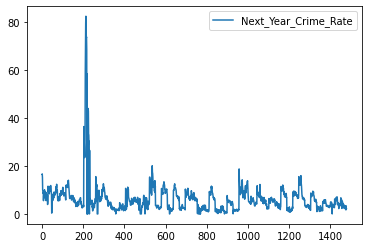

In [6]:
X.plot()
plt.show()

In [7]:
#Extracting the datetime and output column from the testing dataset
 
X_test = test_data[["year", "Next_Year_Crime_Rate"]]
X_test['year'] = pd.to_datetime(X_test['year']).dt.to_period('M')
X_test.head()
#X.year = X.year.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,Next_Year_Crime_Rate
0,2009-01,6.022282
1,2010-01,4.984362
2,2011-01,5.473267
3,2012-01,5.564906
4,2013-01,6.515021


Setting the font for Visualization labels

In [8]:
fontdict_x = {'family': 'Times New Roman',
        'color':  'red',
        'weight': 'normal',
        'size': 14,
        }

fontdict_y = {'family': 'Times New Roman',
        'color':  'grey',
        'weight': 'normal',
        'size': 14,
        }

Visualizing the test set

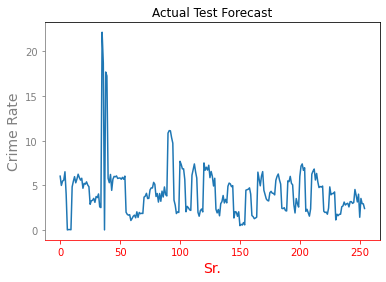

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(X_test['Next_Year_Crime_Rate'])
ax.set_xlabel('Sr.', fontdict=fontdict_x)
ax.set_ylabel('Crime Rate', fontdict=fontdict_y)
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('grey')
ax.set_title('Actual Test Forecast')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='grey')
plt.show()

Setting the year column as the index



In [12]:
X = X.set_index('year')

#Creating an array of the training set values
train_data = X.values

In [13]:
X_test = X_test.set_index('year')

#Creating an array of the testing set values
test_dat_val = X_test.values

In [ ]:
#test_dat_val
#train_data

# Auto-Regressive Model

predicted=3.011522, expected=6.022282
predicted=3.265604, expected=4.984362
predicted=4.091291, expected=5.473267
predicted=4.937963, expected=5.564906
predicted=5.238095, expected=6.515021
predicted=5.935033, expected=3.991158
predicted=5.920366, expected=0.000000
predicted=11.270738, expected=0.041546
predicted=15.027353, expected=0.041428
predicted=12.979753, expected=0.020661
predicted=10.349424, expected=4.825896
predicted=10.778675, expected=5.444696
predicted=10.369151, expected=5.967704
predicted=10.882272, expected=5.276010
predicted=4.777493, expected=5.700216
predicted=-0.525952, expected=6.243170
predicted=-0.448094, expected=5.861893
predicted=-0.065413, expected=5.577449
predicted=7.447791, expected=5.788888
predicted=12.339810, expected=4.667159
predicted=11.558315, expected=5.218646
predicted=6.656559, expected=5.125734
predicted=8.856712, expected=5.384149
predicted=6.283015, expected=5.032938
predicted=7.143050, expected=4.837050
predicted=4.207937, expected=2.872408


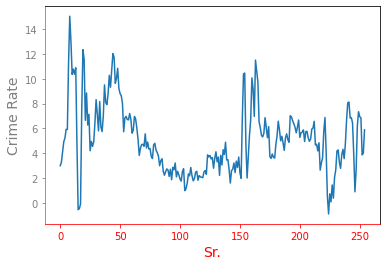

In [ ]:

for i in range(len(test_dat_val)):
  model = AutoReg(train_data, lags=20)   #lags: number of lags to include in the model if an integer or the list of lag indices to include
  model_fit = model.fit()
  predictions = model_fit.predict(start=len(test_dat_val), end=len(test_dat_val)+len(test_dat_val)-1, dynamic=False)   #start and end term for the model to predict
  print('predicted=%f, expected=%f' % (predictions[i], test_dat_val[i]))
rmse = sqrt(mean_squared_error(test_dat_val, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(predictions)
ax.set_xlabel('Sr.', fontdict=fontdict_x)
ax.set_ylabel('Crime Rate',fontdict=fontdict_y)
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='grey')
plt.show()

# ARIMA Model

predicted=2.1337172208972603, expected=6.022282445046673
predicted=6.015201680471661, expected=4.984361565587967
predicted=4.976584139819121, expected=5.47326651387131
predicted=5.465824612028191, expected=5.564905803789563
predicted=5.557530776838982, expected=6.5150205155281435
predicted=6.5082911396582155, expected=3.991157600783521
predicted=3.982731877951279, expected=0.0
predicted=-0.011107913554035065, expected=0.04154595834685308
predicted=0.030473496082791485, expected=0.041427938172945065
predicted=0.030362840457240026, expected=0.020660999079139267
predicted=0.00958941721120965, expected=4.825896376025631
predicted=4.818059336201687, expected=5.44469550540386
predicted=5.437279004836384, expected=5.967703871683518
predicted=5.960643179447747, expected=5.276009713269165
predicted=5.268490035208348, expected=5.700215866162979
predicted=5.692985427718831, expected=6.243169582278888
predicted=6.2363074028801595, expected=5.8618931780555465
predicted=5.854780550917894, expected=5

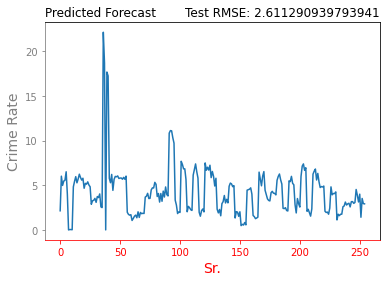

In [18]:
train_val = [i for i in train_data]
preds = []
for x in range(len(test_dat_val)):
	model_ar = ARIMA(train_val, order=(0,1,0), trend="t")        #order: order of the model for the autoregressive, differences, and moving average components   #trend: Parameter controlling the deterministic trend. Can be specified as a string where ‘c’ indicates a constant term, ‘t’ indicates a linear trend in time
	model_ar_fit = model_ar.fit()
	output = model_ar_fit.forecast()
	ypred = output[0]
	preds.append(ypred)
	obs = test_dat_val[x]
	train_val.append(obs)
	print('predicted={}, expected={}'.format(ypred, *obs))
rmse = sqrt(mean_squared_error(test_dat_val, preds))

#plotting the ARIMA results wrt to actual results
print('\n')
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(preds)
ax.set_xlabel('Sr.', fontdict=fontdict_x)
ax.set_ylabel('Crime Rate',fontdict=fontdict_y)
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('grey')
ax.set_title('Predicted Forecast', loc='left')
ax.set_title('Test RMSE: {}'.format(rmse), loc='right')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='grey')
plt.show()